$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 1 $$

# `01` Assignment 01
- Design your own simple ANN,(one perceptron with one input layer
and one output neuron)
- Use the data points listed in the adjacent Table as your training data.
- Assume the activation function is sigmoid.
- Assume there is no bias for simplicity (b=0).
- Test your design using different iteration numbers.


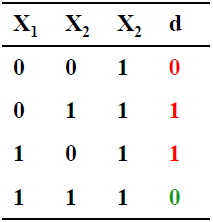

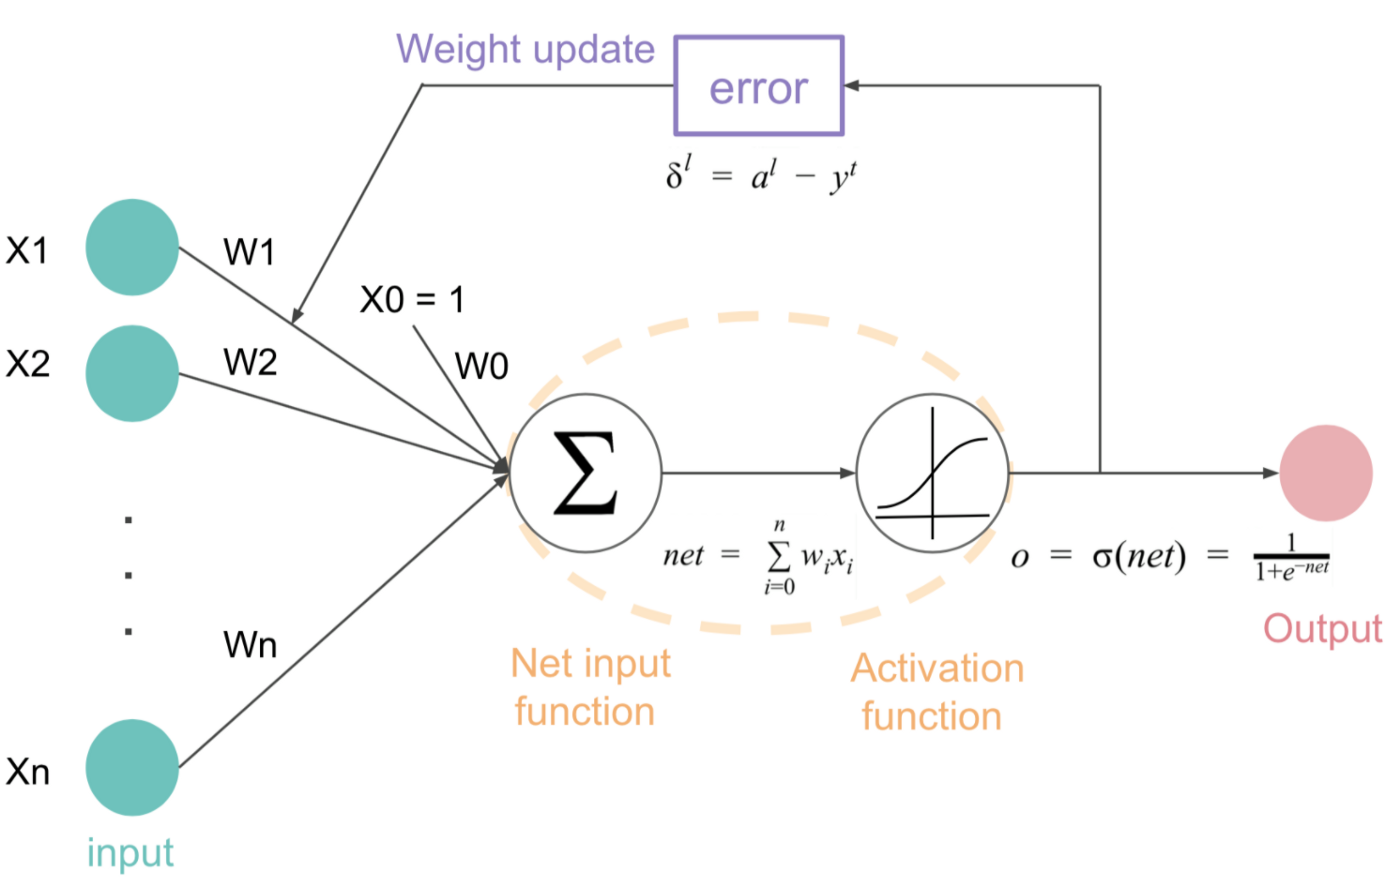

## `i` Implementation

In [11]:
import numpy as np

np.random.seed = 42

In [12]:
np.random.seed = 42
class Simple_ANN:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.W = np.random.randn (1, X.shape[1])
        self.y_pred = np.zeros_like(y)


    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))



    def sigmoid_derivative(self, p):
        return self.sigmoid(p) *  (1 - self.sigmoid(p))



    def feedforward(self):
        # print(self.W.shape)
        # print(self.X.shape)
        # print(self.W.T.shape)
        self.y_pred = self.sigmoid( np.dot( self.X, self.W.T) )
        return self. y_pred




    def backprop(self):
        self.W = self.W + 0.00001 * np.dot(self.X.T, (self.y - self.y_pred) * self.sigmoid_derivative(self.y_pred))

    def fit(self, iterations, verbose=1):
        for i in range(iterations):
          print(f"-------------iteration {i}------------")
          self.y_pred = self.feedforward()
          print(f"y_pred= { self.y_pred}")
          self.backprop()
          loss = np.mean(self.y - self.y_pred)
          if verbose:
              print(f"loss= {loss}")


## `ii` Testing

In [13]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [14]:
np.random.seed = 42
model = Simple_ANN (X, y)
model.fit(iterations=1000, verbose=1)

Streaming output truncated to the last 5000 lines.
 [0.72731125 0.72709078 0.72712364]]
loss= -0.0071488432599598195
-------------iteration 167------------
y_pred= [[0.53779757 0.53765861 0.53767931]
 [0.47836467 0.47794621 0.47800853]
 [0.2857439  0.28551578 0.28554974]
 [0.72731244 0.72709064 0.72712369]]
loss= -0.0071492566711890875
-------------iteration 168------------
y_pred= [[0.53779831 0.53765852 0.53767934]
 [0.4783669  0.47794593 0.47800863]
 [0.28574512 0.28551563 0.2855498 ]
 [0.72731362 0.7270905  0.72712374]]
loss= -0.007149670081381972
-------------iteration 169------------
y_pred= [[0.53779905 0.53765843 0.53767938]
 [0.47836914 0.47794566 0.47800873]
 [0.28574634 0.28551548 0.28554985]
 [0.7273148  0.72709035 0.7271238 ]]
loss= -0.0071500834905385
-------------iteration 170------------
y_pred= [[0.53779979 0.53765834 0.53767941]
 [0.47837137 0.47794539 0.47800883]
 [0.28574756 0.28551533 0.28554991]
 [0.72731599 0.72709021 0.72712385]]
loss= -0.007150496898658626
----

----

# `02` Assignment 02
- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

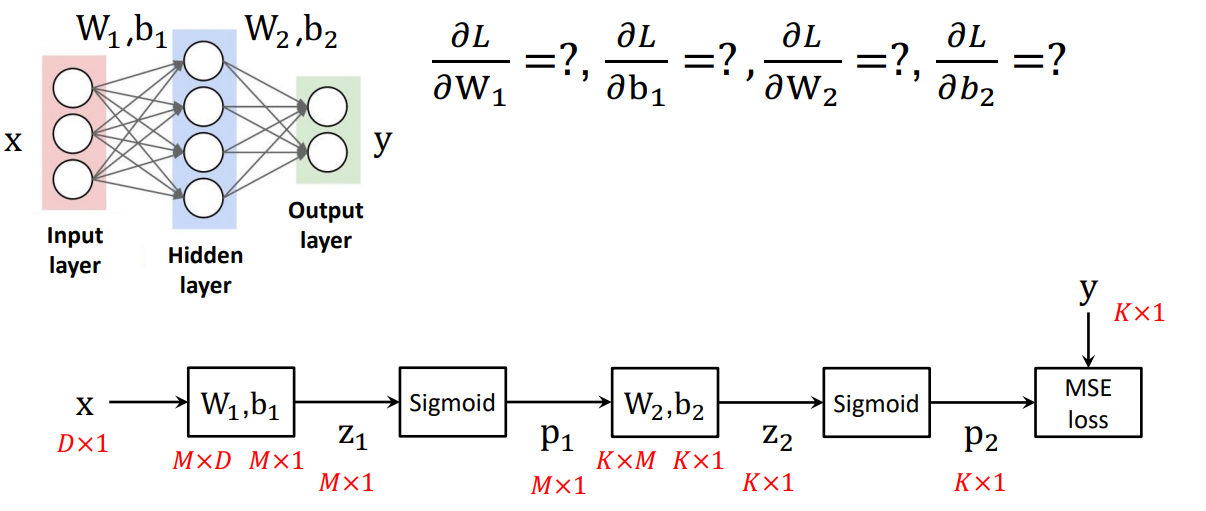

## `i` Implementation

In [15]:
# class MLP_ANN:
#     def __init__(self, X, y, num_hidden_nodes,learning_rate=.0001):
#       self.X = X
#       self.y = y
#       self.W1 = np.random.randn (1, X.shape[1]*num_hidden_nodes)
#       self.W2 = np.random.randn (1, y.shape[1]*num_hidden_nodes)
#       self.learning_rate = learning_rate
#       self.y_pred = np.zeros_like(y)
#       self. num_hidden_nodes = num_hidden_nodes

#     def sigmoid(self, z):
#       return 1/(1 + np.exp(-z))


#     def sigmoid_derivative(self, p):
#       return self.sigmoid(p) *  (1 - self.sigmoid(p))


#     def feedforward(self):
#       #from input features x to hidden layer
#       self.hidden_layer_out  = self.sigmoid( np.dot( self.X, self.W1.T) )

#       #from input hidden layer to output
#       self.y_pred = self.sigmoid( np.dot( self.hidden_layer_out, self.W2.T) )

#       return self.hidden_layer_out, self.y_pred



#     def backprop(self):
#       error = self.y - self.y_pred
#       output_error_term = error* self. sigmoid_derivative(self.y_pred)
#       hidden_error_term = self.W2 * output_error_term* self. sigmoid_derivative( self.hidden_layer_out)
#       hidden_error_term = np.reshape(hidden_error_term,(1,2))

#       delta_w2 = self.learning_rate * output_error_term * self.hidden_layer_out

#       X = np.reshape(-1,1)
#       delta_w1= self.learning_rate *np.matmul(X , hidden_error_term)

#       return delta_w2, delta_w1

#       # delta_w_k_output = self.learning_rate * error * self.sigmoid_derivative(self.y_pred)
#       # self.W = self.W + 0.00001 * np.dot(self.X.T, (self.y - self.y_pred) * self.sigmoid_derivative(self.y_pred))
#       #   pass

#     def fit(self, iterations, verbose=1):
#         for i in range(iterations):
#           print(f"-------------iteration {i}------------")
#           self.hidden_layer_out, self.y_pred = self.feedforward()
#           print(f"y_pred= { self.y_pred}")
#           self.backprop()
#           loss = np.mean(self.y - self.y_pred)
#           if verbose:
#               print(f"loss= {loss}")
#         pass

In [16]:
np.random.seed= 42

class MLP_ANN:
    def __init__(self, X, y, num_hidden_nodes, learning_rate=0.1):
        self.X = X
        self.y = y
        input_size = X.shape[1]
        output_size = y.shape[1]
        self.W1 = np.random.randn(input_size, num_hidden_nodes)
        self.W2 = np.random.randn(num_hidden_nodes, output_size)
        self.learning_rate = learning_rate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        return p * (1 - p)

    def feedforward(self):
        self.hidden_layer_out = self.sigmoid(np.dot(self.X, self.W1))
        self.y_pred = self.sigmoid(np.dot(self.hidden_layer_out, self.W2))
        return self.hidden_layer_out, self.y_pred

    def backprop(self):
        error = self.y - self.y_pred
        output_error_term = error * self.sigmoid_derivative(self.y_pred)
        hidden_error_term = np.dot(output_error_term, self.W2.T) * self.sigmoid_derivative(self.hidden_layer_out)

        delta_w2 = self.learning_rate * np.dot(self.hidden_layer_out.T, output_error_term)
        delta_w1 = self.learning_rate * np.dot(self.X.T, hidden_error_term)

        self.W2 += delta_w2
        self.W1 += delta_w1

    def fit(self, iterations, verbose=1):
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            if verbose:
                loss = np.mean(np.square(self.y - self.y_pred))
                print(f"Iteration {i}, Loss: {loss}")


## `ii` Testing

In [17]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [18]:
model = MLP_ANN (X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0, Loss: 0.39796508318261686
Iteration 1, Loss: 0.3953420464474381
Iteration 2, Loss: 0.39266067339686545
Iteration 3, Loss: 0.3899234430371198
Iteration 4, Loss: 0.387133305265803
Iteration 5, Loss: 0.3842936836543417
Iteration 6, Loss: 0.38140846887098145
Iteration 7, Loss: 0.37848200174325497
Iteration 8, Loss: 0.37551904525434243
Iteration 9, Loss: 0.37252474515239486
Iteration 10, Loss: 0.3695045793135682
Iteration 11, Loss: 0.3664642965167406
Iteration 12, Loss: 0.36340984583021
Iteration 13, Loss: 0.3603472983405085
Iteration 14, Loss: 0.35728276342921506
Iteration 15, Loss: 0.35422230218374695
Iteration 16, Loss: 0.3511718407759256
Iteration 17, Loss: 0.3481370867304995
Iteration 18, Loss: 0.3451234509209966
Iteration 19, Loss: 0.34213597787418354
Iteration 20, Loss: 0.3391792865549143
Iteration 21, Loss: 0.3362575232723822
Iteration 22, Loss: 0.3333743277393397
Iteration 23, Loss: 0.3305328126759099
Iteration 24, Loss: 0.32773555672737537
Iteration 25, Loss: 0.324984

---

# `03` Assignment 03
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [19]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed = 42

In [20]:
dataset= pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
df= pd.DataFrame(dataset.copy())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
X.shape

(768, 8)

In [24]:
y.shape

(768,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## `i` Shallow network


In [26]:
model= Sequential()
model.add (Dense(5, activation= 'relu', input_shape= (X_train.shape[1],)))
model.add (Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
X.shape

(768, 8)

In [28]:
model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
768/32

24.0

In [30]:
History = model.fit(X_train, y_train, epochs=150, batch_size=32)
History

Epoch 1/150
17/17 [==============================] - 1s 2ms/step - loss: 8.9026 - accuracy: 0.4475
Epoch 2/150
17/17 [==============================] - 0s 2ms/step - loss: 5.8509 - accuracy: 0.5661
Epoch 3/150
17/17 [==============================] - 0s 2ms/step - loss: 4.6278 - accuracy: 0.5914
Epoch 4/150
17/17 [==============================] - 0s 2ms/step - loss: 3.8329 - accuracy: 0.6226
Epoch 5/150
17/17 [==============================] - 0s 2ms/step - loss: 3.3232 - accuracy: 0.6323
Epoch 6/150
17/17 [==============================] - 0s 2ms/step - loss: 3.1187 - accuracy: 0.6342
Epoch 7/150
17/17 [==============================] - 0s 2ms/step - loss: 3.0300 - accuracy: 0.6265
Epoch 8/150
17/17 [==============================] - 0s 2ms/step - loss: 2.9497 - accuracy: 0.6265
Epoch 9/150
17/17 [==============================] - 0s 2ms/step - loss: 2.8814 - accuracy: 0.6304
Epoch 10/150
17/17 [==============================] - 0s 2ms/step - loss: 2.8026 - accuracy: 0.6323
Epoch 11/

In [31]:
LOSS= History.history['loss']

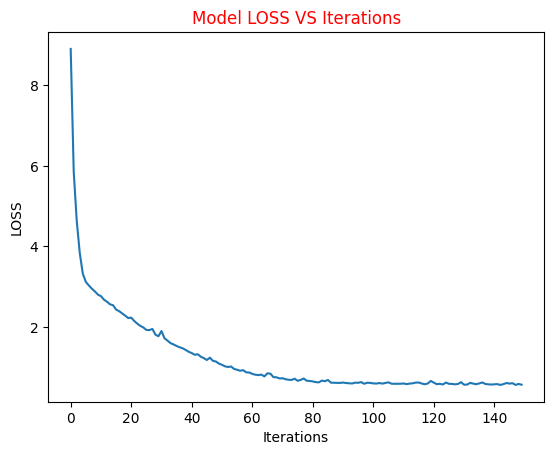

In [32]:
plt.plot(LOSS)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model LOSS VS Iterations', color='red')
plt.show();

In [33]:
ACCURACY= History.history['accuracy']

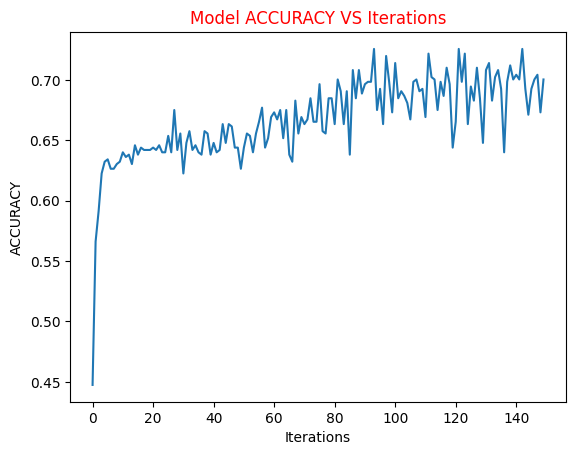

In [34]:
plt.plot(ACCURACY)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model ACCURACY VS Iterations', color='red')
plt.show();

In [35]:
model.evaluate(X_train, y_train)

17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.6926


[0.572765588760376, 0.6926069855690002]

In [36]:
model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


array([[0.31460607],
       [0.20482819],
       [0.2779705 ],
       [0.22908583],
       [0.28012988],
       [0.25501138],
       [0.18283749],
       [0.73840106],
       [0.45033407],
       [0.42560026],
       [0.3378167 ],
       [0.4424967 ],
       [0.30556917],
       [0.2022346 ],
       [0.21268685],
       [0.32569787],
       [0.14729533],
       [0.18115804],
       [0.88622123],
       [0.37263915],
       [0.2289013 ],
       [0.10635954],
       [0.8169419 ],
       [0.20056605],
       [0.409929  ],
       [0.57755494],
       [0.33484703],
       [0.13619551],
       [0.13409996],
       [0.14801337],
       [0.40184522],
       [0.42476818],
       [0.38428888],
       [0.8284128 ],
       [0.14628136],
       [0.45795068],
       [0.9998836 ],
       [0.11017653],
       [0.36499456],
       [0.75717014],
       [0.22657213],
       [0.48878828],
       [0.24784353],
       [0.38160494],
       [0.09253217],
       [0.30707118],
       [0.25240326],
       [0.206

In [37]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6969


[0.5894307494163513, 0.6968504190444946]

## `ii` Deep network


In [117]:
model2= Sequential()
model2.add (Dense(5, activation= 'relu', input_shape= (X_train.shape[1],)))
model2.add(Dense(12, activation='sigmoid'))
model2.add(Dense(8, activation='sigmoid'))
model2.add (Dense(1, activation= 'sigmoid'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 5)                 45        
                                                                 
 dense_32 (Dense)            (None, 12)                72        
                                                                 
 dense_33 (Dense)            (None, 8)                 104       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 230 (920.00 Byte)
Trainable params: 230 (920.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model2.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
History2 = model2.fit(X_train, y_train, epochs=150, batch_size=32)
History2

Epoch 1/150
17/17 [==============================] - 4s 2ms/step - loss: 0.7199 - accuracy: 0.3619
Epoch 2/150
17/17 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4961
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.6479
Epoch 4/150
17/17 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6459
Epoch 5/150
17/17 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6459
Epoch 6/150
17/17 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6459
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6459
Epoch 8/150
17/17 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6459
Epoch 9/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6459
Epoch 10/150
17/17 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6459
Epoch 11/

In [120]:
LOSS2= History2.history['loss']

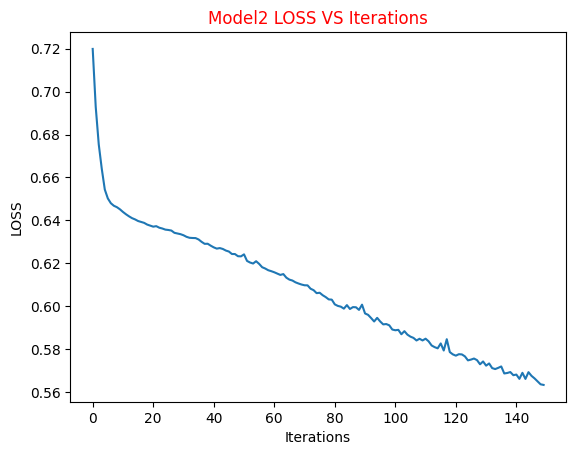

In [121]:
plt.plot(LOSS2)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model2 LOSS VS Iterations', color='red')
plt.show();

In [122]:
ACCURACY2= History2.history['accuracy']

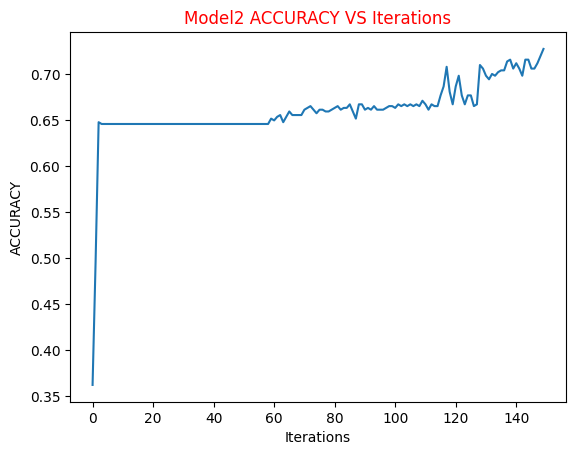

In [123]:
plt.plot(ACCURACY2)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model2 ACCURACY VS Iterations', color='red')
plt.show();

In [132]:
loss, accuracy = model2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6772


## `iii` Deeper network


In [124]:
model3= Sequential()
model3.add (Dense(5, activation= 'relu', input_shape= (X_train.shape[1],)))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(16, activation='sigmoid'))
model3.add(Dense(8, activation='sigmoid'))
model3.add (Dense(1, activation= 'sigmoid'))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 5)                 45        
                                                                 
 dense_36 (Dense)            (None, 32)                192       
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 910 (3.55 KB)
Trainable params: 910 (3.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model3.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [126]:
History3 = model3.fit(X_train, y_train, epochs=150, batch_size=32)
History3

Epoch 1/150
17/17 [==============================] - 3s 3ms/step - loss: 0.6817 - accuracy: 0.6498
Epoch 2/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6459
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6459
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6459
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6459
Epoch 6/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6459
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6459
Epoch 8/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6459
Epoch 9/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6459
Epoch 10/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6459
Epoch 11/

In [127]:
LOSS3= History3.history['loss']

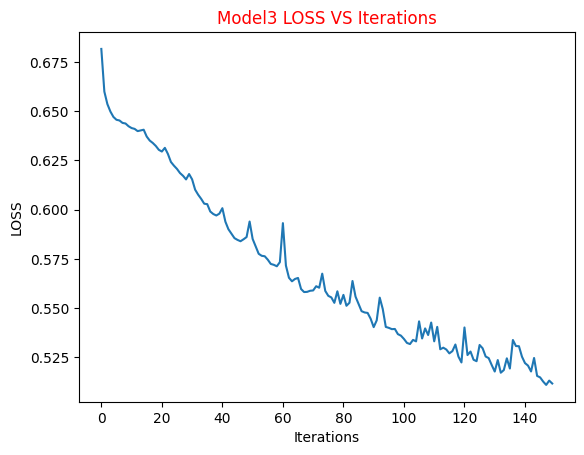

In [128]:
plt.plot(LOSS3)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model3 LOSS VS Iterations', color='red')
plt.show();

In [129]:
ACCURACY3= History3.history['accuracy']

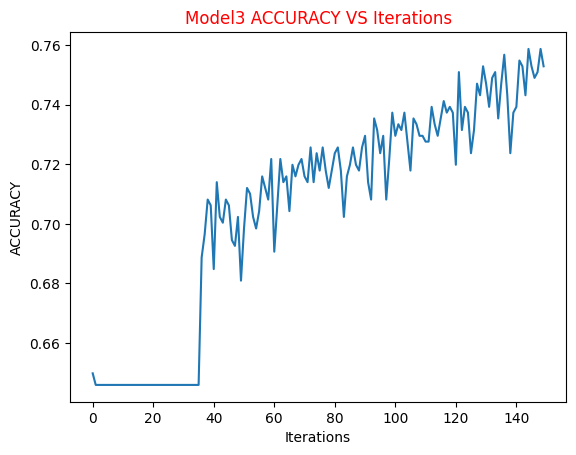

In [131]:
plt.plot(ACCURACY3)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model3 ACCURACY VS Iterations', color='red')
plt.show();

In [135]:
loss3, accuracy3 = model3.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7165


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$